In [23]:
import pandas as pd 
import  numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [47]:
df = pd.read_csv('Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#replace blanks with 0

In [49]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [51]:
df.isnull().sum().sum()

0

In [52]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [53]:
df.duplicated().sum()
df["customerID"].duplicated().sum()

0

In [54]:
def  conv(value):
    if value==0:
        return "no"
    else:
        return "yes"
    
df["SeniorCitizen"] = df['SeniorCitizen'].apply(conv)    

In [55]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


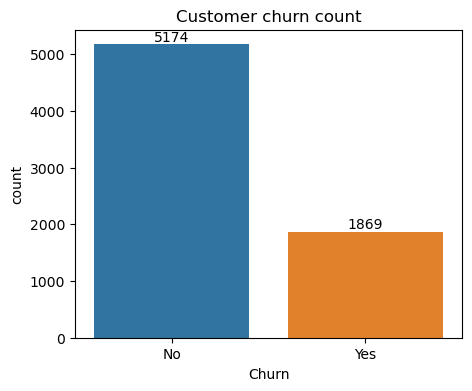

In [56]:
plt.figure(figsize =(5,4))
ax = sns.countplot(x='Churn',data = df)
ax.bar_label(ax.containers[0])
plt.title("Customer churn count")
plt.show()

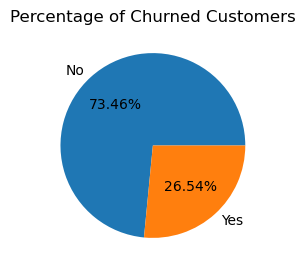

In [57]:
plt.figure(figsize =(3,3))
gb =df.groupby('Churn').agg({'Churn':'count'})
plt.pie(gb['Churn'],labels = gb.index,autopct = '%1.2f%%')
plt.title('Percentage of Churned Customers')
plt.show()

#from this pie chart we can conclude that 26.54% of our customers are churned out 

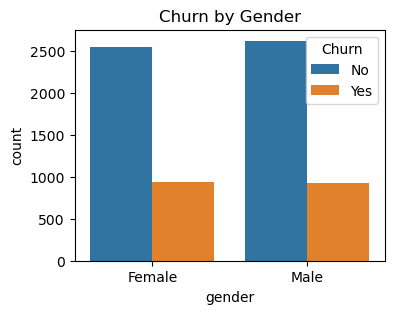

In [58]:
plt.figure(figsize =(4,3))
sns.countplot(x = "gender",data =df,hue="Churn")
plt.title('Churn by Gender')
plt.show()

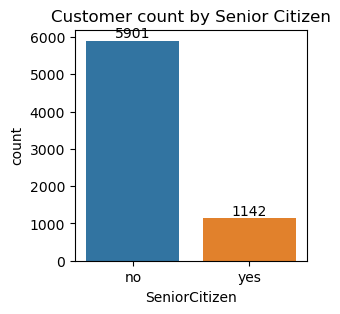

In [70]:
plt.figure(figsize =(3,3))
ax = sns.countplot(x = "SeniorCitizen",data =df)
ax.bar_label(ax.containers[0])
plt.title('Customer count by Senior Citizen')
plt.show()

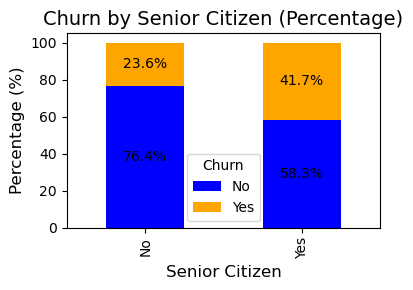

In [67]:
# Calculate the count of each category grouped by 'SeniorCitizen' and 'Churn'
count_data = df.groupby(['SeniorCitizen', 'Churn']).size().unstack()

# Calculate the percentage of each group by dividing each count by the total for that 'SeniorCitizen'
count_data_percentage = count_data.div(count_data.sum(axis=1), axis=0) * 100

# Plot the stacked bar chart
ax = count_data_percentage.plot(kind='bar', stacked=True, figsize=(4, 3), color=['blue', 'orange'])

# Add labels as percentage
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height() / 2.),
                horizontalalignment='center',
                verticalalignment='center',
                fontsize=10,
                color='black')

# Add title and axis labels
plt.title('Churn by Senior Citizen (Percentage)', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xlabel('Senior Citizen', fontsize=12)
plt.xticks([0, 1], ['No', 'Yes'])  # Adjust for your specific 'SeniorCitizen' encoding
plt.tight_layout()

# Show plot
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

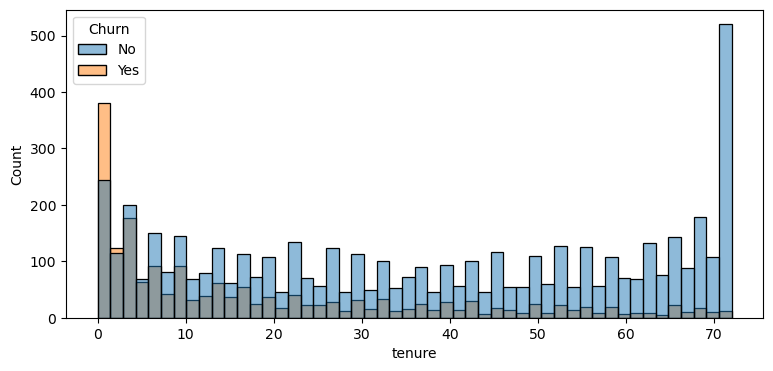

In [76]:
plt.figure(figsize =(9,4))
sns.histplot(x = 'tenure',data = df,bins = 50 ,hue='Churn')
plt.show

#people who have used services initially 1,2 months get churned and who used for long time have stayed

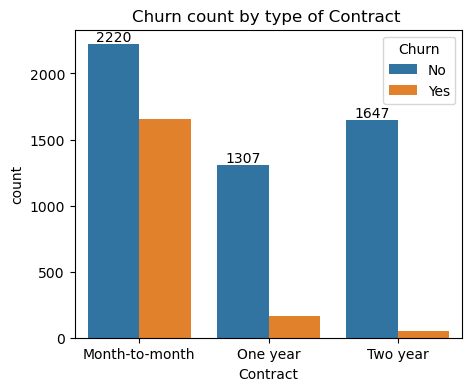

In [80]:
plt.figure(figsize =(5,4))
ax = sns.countplot(x = "Contract",data =df, hue ='Churn')
ax.bar_label(ax.containers[0])
plt.title('Churn count by type of Contract ')
plt.show()

#Churn rate of month to month contract is higher than 1 or 2  year contacts

In [82]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

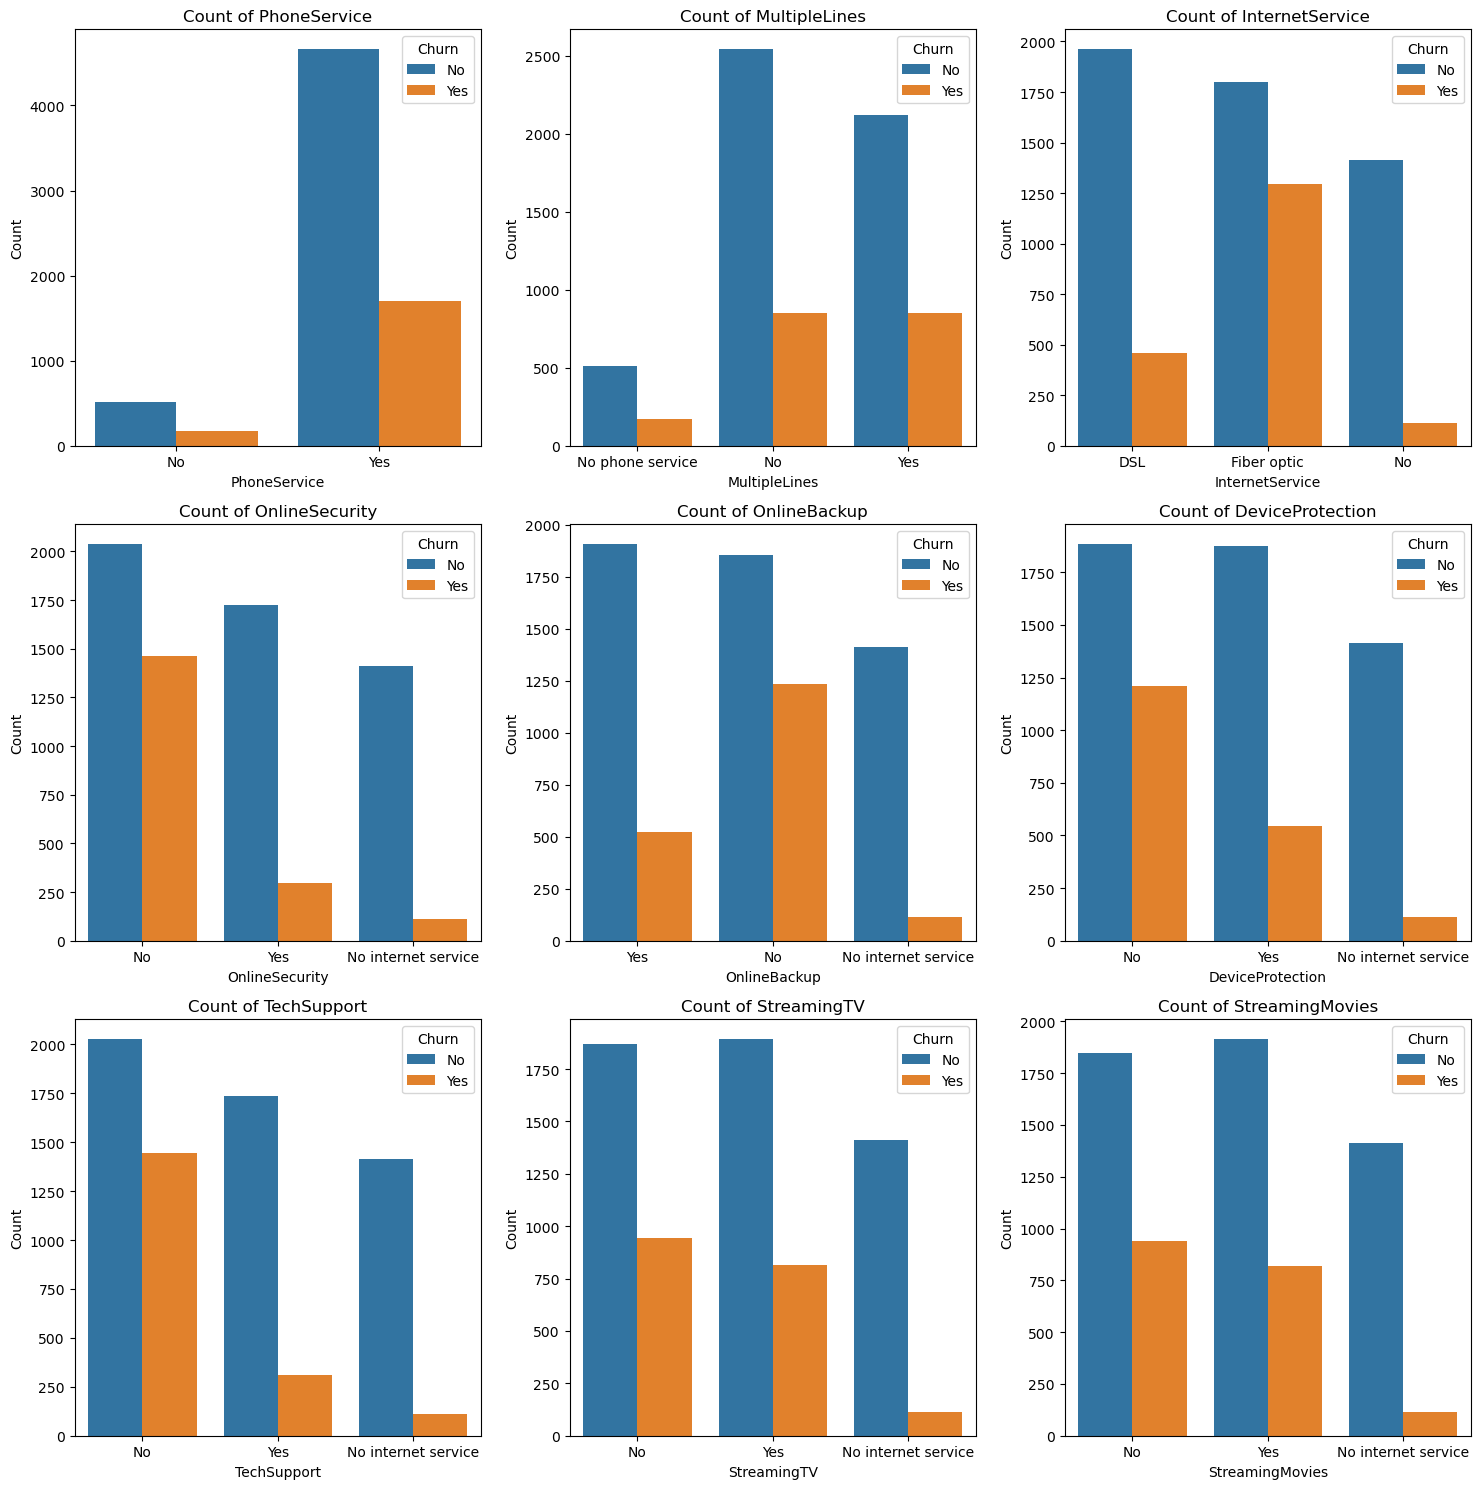

In [84]:
# List of columns you want to plot
columns_to_plot = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Number of rows and columns for the subplot grid (adjust as needed)
n_cols = 3  # You can adjust this based on the number of columns
n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Set up the figure and axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flatten the axes array for easy iteration if the subplot grid is 2D
axes = axes.flatten()

# Loop over each column and plot a countplot
for i, column in enumerate(columns_to_plot):
    sns.countplot(x=column, data=df, ax=axes[i],hue='Churn')
    axes[i].set_title(f'Count of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

# Remove any unused axes (in case the number of subplots doesn't fill the grid completely)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


# Notably, customers with fiber optic internet and those lacking online security, backup, or tech support appear more likely to churn. This analysis helps identify factors contributing to customer attrition

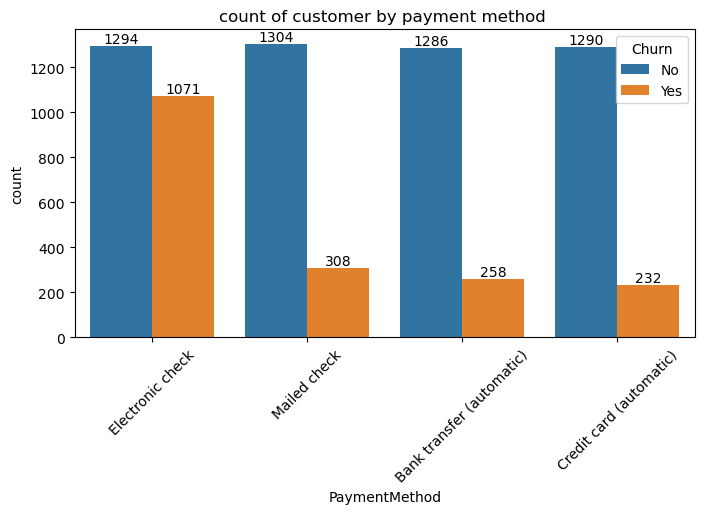

In [90]:
plt.figure(figsize =(8,4))
ax = sns.countplot(x = "PaymentMethod",data =df, hue ='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('count of customer by payment method ')
plt.xticks(rotation = 45)
plt.show()

#customers likely to churn when they are using electronic checkpayment method